# Observations and Insights
    From the data gathered, there were no cities with a humidity of over 100%.  Even though there weren't any over 100%, 559 cities had humidities that equaled 100% and 539 had values under 100%.  There were more cities with 100% than cities below 100% humidity.
    
    When looking at the maximum temperature of the Northern Hemisphere to it's latitude linear regression, the line equation y = -1.5x + 100.2 in the data states that the temperature goes down the further East you go.  This is represented by the negative -1.5 slope of the line.   
    
    On the other side, the Southern Hemisphere had the opposite effect. It's data shows that it's line equation in the data is y = 0.44x + 84.12.  With a positive slope of .44, this illustrates that the Max Temperature goes up the further East you go.


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"The city count is {len(cities)}.")

The city count is 604.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#time.sleep(1)

In [4]:
# # # Create URL
# # #url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&"
# # base_url = "http://api.openweathermap.org/data/2.5/weather?"
# # units = "Imperial"
# # query_url = base_url + "units=" + units + "&appid=" + weather_api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list for city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Initialize counters
record_count = 1

# Loop through all the cities in our list
for city in cities:
    
    # Create endpoint URL for each city
    city_url = url + "&q=" + city

    # example: http://api.openweathermap.org/data/2.5/forecast?id=524901&units=Imperial&appid=5429f2392433cc4510c999f528bc608d&q=Atlanta
    
    print(f"Processing Record '{record_count}' | '{city}'")
    
    record_count = record_count + 1

    print(city_url)
    
    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        
        # Append the data to the list
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"The city of '{city}' is not found. Skipping........")
    pass
#    time.sleep(1)
# Print Loading Data is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record '1' | 'nouadhibou'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=nouadhibou
Processing Record '2' | 'broome'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=broome
Processing Record '3' | 'punta arenas'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=punta arenas
Processing Record '4' | 'torbay'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=torbay
Processing Record '5' | 'thompson'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=thompson
Processing Record '6' | 'pisco'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=pisco
Processing Record '7' | 'hobyo'
http://api.openweathermap.or

Processing Record '55' | 'maua'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=maua
Processing Record '56' | 'victoria'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=victoria
Processing Record '57' | 'mount gambier'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=mount gambier
Processing Record '58' | 'georgetown'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=georgetown
Processing Record '59' | 'dikson'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=dikson
Processing Record '60' | 'yar-sale'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=yar-sale
Processing Record '61' | 'busselton'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178

Processing Record '109' | 'salalah'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=salalah
Processing Record '110' | 'upata'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=upata
Processing Record '111' | 'sol-iletsk'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=sol-iletsk
Processing Record '112' | 'soyo'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=soyo
Processing Record '113' | 'yarada'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=yarada
Processing Record '114' | 'celestun'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=celestun
Processing Record '115' | 'landskrona'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a1

Processing Record '163' | 'luganville'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=luganville
Processing Record '164' | 'edd'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=edd
Processing Record '165' | 'ilulissat'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=ilulissat
Processing Record '166' | 'xingcheng'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=xingcheng
Processing Record '167' | 'goure'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=goure
Processing Record '168' | 'faya'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=faya
Processing Record '169' | 'nome'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483

Processing Record '217' | 'middelburg'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=middelburg
Processing Record '218' | 'vila'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=vila
Processing Record '219' | 'dalvik'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=dalvik
Processing Record '220' | 'ibaiti'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=ibaiti
Processing Record '221' | 'walvis bay'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=walvis bay
Processing Record '222' | 'calatayud'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=calatayud
Processing Record '223' | 'kabalo'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=231780517

Processing Record '271' | 'deputatskiy'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=deputatskiy
Processing Record '272' | 'gobabis'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=gobabis
Processing Record '273' | 'tautira'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=tautira
Processing Record '274' | 'wahiawa'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=wahiawa
Processing Record '275' | 'graaff-reinet'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=graaff-reinet
Processing Record '276' | 'cam pha'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=cam pha
The city of 'cam pha' is not found. Skipping........
Processing Record '277' | 'guiratinga'
http:/

Processing Record '325' | 'divnogorsk'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=divnogorsk
Processing Record '326' | 'avera'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=avera
Processing Record '327' | 'cervo'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=cervo
Processing Record '328' | 'ngukurr'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=ngukurr
The city of 'ngukurr' is not found. Skipping........
Processing Record '329' | 'ixtapa'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=ixtapa
Processing Record '330' | 'sharjah'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=sharjah
Processing Record '331' | 'crixas'
http://api.openweathermap.org/data

Processing Record '380' | 'la ronge'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=la ronge
Processing Record '381' | 'sur'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=sur
Processing Record '382' | 'vercelli'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=vercelli
Processing Record '383' | 'inirida'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=inirida
Processing Record '384' | 'manzanillo'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=manzanillo
Processing Record '385' | 'lagunas'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=lagunas
Processing Record '386' | 'riyadh'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8

Processing Record '434' | 'chicama'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=chicama
Processing Record '435' | 'ucluelet'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=ucluelet
Processing Record '436' | 'quatre cocos'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=quatre cocos
Processing Record '437' | 'solikamsk'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=solikamsk
Processing Record '438' | 'nampula'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=nampula
Processing Record '439' | 'alice springs'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=alice springs
Processing Record '440' | 'sechura'
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record '489' | 'svetlogorsk'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=svetlogorsk
Processing Record '490' | 'panama city'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=panama city
Processing Record '491' | 'wilmington'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=wilmington
Processing Record '492' | 'ban nahin'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=ban nahin
Processing Record '493' | 'bowen'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=bowen
Processing Record '494' | 'agua dulce'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=agua dulce
Processing Record '495' | 'vanavara'
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record '544' | 'hilton head island'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=hilton head island
Processing Record '545' | 'kahului'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=kahului
Processing Record '546' | 'bay roberts'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=bay roberts
Processing Record '547' | 'honiara'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=honiara
Processing Record '548' | 'talnakh'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=talnakh
Processing Record '549' | 'college'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=college
Processing Record '550' | 'karaul'
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record '598' | 'taree'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=taree
Processing Record '599' | 'alotau'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=alotau
The city of 'alotau' is not found. Skipping........
Processing Record '600' | 'misratah'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=misratah
Processing Record '601' | 'malanje'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=malanje
Processing Record '602' | 'srednekolymsk'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=srednekolymsk
Processing Record '603' | 'morehead'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23178051734b8a14fb483ada0272b26c&q=morehead
Processing Record '604' | 'hihifo'
http://api.openweathe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_weather_df = pd.DataFrame(city_data)
cities_weather_df

# dataframe to .csv file
cities_weather_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)
cities_weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nouadhibou,20.9310,-17.0347,69.8,64,85,11.50,MR,1615492629
1,broome,42.2506,-75.8330,60.8,44,75,14.97,US,1615492629
2,punta arenas,-53.1500,-70.9167,51.8,66,75,28.77,CL,1615492630
3,torbay,47.6666,-52.7314,37.0,69,90,24.16,CA,1615492630
4,thompson,55.7435,-97.8558,1.4,55,20,11.50,CA,1615492630


In [6]:
# # create a dataframe 
# cities_weather_df = pd.DataFrame(city_data, columns=["City"#: city,
#                                 "Country"#: city_country,
#                                 "Date"#: city_date,
#                                 "Lat"#: city_lat,
#                                 "Lng"#: city_lng,
#                                 "Max Temp (F)"#: city_max_temp,
#                                 "Humidity (%)"#: city_humidity,
#                                 "Cloudiness (%)"#: city_clouds,
#                                 "Wind Speed (mph)"#: city_wind,
#                                  ])

# # dataframe to .csv file
# cities_weather_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)
# cities_weather_df

In [7]:
#cities_weather_df = pd.read_csv("C:/Users/joeki/Desktop/python-api-challenge/output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_over_100 = cities_weather_df.loc[cities_weather_df["Humidity"] > 100, :]
humidity_over_100
cities_over_100 = len(cities_weather_df.loc[cities_weather_df["Humidity"] > 100, :])
print(f"There are '{cities_over_100}' cities with over 100 percent humidity.")

There are '0' cities with over 100 percent humidity.


In [9]:
humidity_at_100 = cities_weather_df.loc[cities_weather_df["Humidity"] >= 100, :]
humidity_at_100
cities_at_100 = len(cities_weather_df["Humidity"])
print(f"There are '{cities_at_100}' cities with 100 percent humidity.")

There are '559' cities with 100 percent humidity.


In [10]:
humidity_below_100 = cities_weather_df.loc[cities_weather_df["Humidity"] < 100, :]
humidity_below_100
cities_below_100 = len(cities_weather_df.loc[cities_weather_df["Humidity"] < 100, :])
print(f"There are '{cities_below_100}' cities below 100 percent humidity.")

There are '548' cities below 100 percent humidity.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

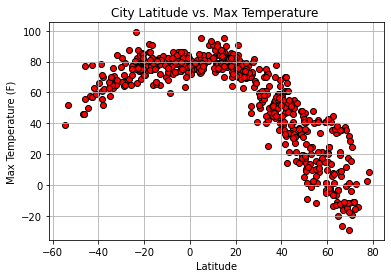

In [11]:
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Max Temp"], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs. Max Temperature ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("C:/Users/joeki/Desktop/python-api-challenge/output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

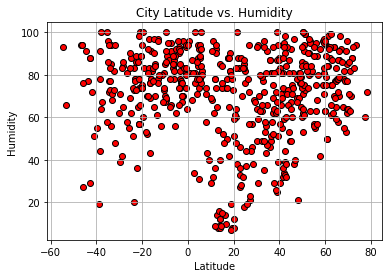

In [12]:
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Humidity"], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("C:/Users/joeki/Desktop/python-api-challenge/output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

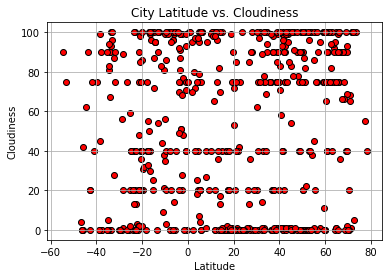

In [13]:
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("C:/Users/joeki/Desktop/python-api-challenge/output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

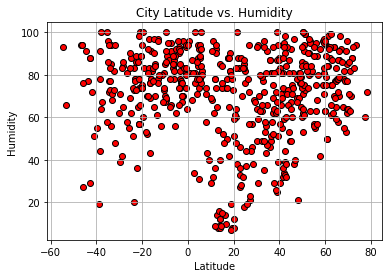

In [14]:
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Humidity"], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("C:/Users/joeki/Desktop/python-api-challenge/output_data/fig4.png")
plt.show()

## Linear Regression

In [15]:
northern_hemisphere_df = cities_weather_df.loc[cities_weather_df["Lat"] >= 0]
northern_hemisphere_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nouadhibou,20.9310,-17.0347,69.80,64,85,11.50,MR,1615492629
1,broome,42.2506,-75.8330,60.80,44,75,14.97,US,1615492629
3,torbay,47.6666,-52.7314,37.00,69,90,24.16,CA,1615492630
4,thompson,55.7435,-97.8558,1.40,55,20,11.50,CA,1615492630
6,hobyo,5.3505,48.5268,79.36,80,4,15.97,SO,1615492631


In [16]:
southern_hemisphere_df = cities_weather_df.loc[cities_weather_df["Lat"] < 0]
southern_hemisphere_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,punta arenas,-53.1500,-70.9167,51.80,66,75,28.77,CL,1615492630
5,pisco,-13.7000,-76.2167,82.40,61,0,16.11,PE,1615492630
7,vaini,-21.2000,-175.2000,75.20,78,75,9.22,TO,1615492631
9,mataura,-46.1927,168.8643,46.00,94,0,5.01,NZ,1615492632
10,rikitea,-23.1203,-134.9692,79.34,78,100,14.41,PF,1615492632


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
max_temp_north = northern_hemisphere_df["Max Temp"]
max_temp_north
lat_line_regr_north = northern_hemisphere_df["Lat"]
lat_line_regr_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_line_regr_north, max_temp_north)
regress_values = lat_line_regr_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_line_regr_north,max_temp_north)
plt.plot(lat_line_regr_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2} and the equation for the line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
max_temp_south = southern_hemisphere_df["Max Temp"]
max_temp_south
lat_line_regr_south = southern_hemisphere_df["Lat"]
lat_line_regr_south
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_line_regr_south, max_temp_south)
regress_values = lat_line_regr_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_line_regr_south,max_temp_south)
plt.plot(lat_line_regr_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2} and the equation for the line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
humidity_north = northern_hemisphere_df["Humidity"]
humidity_north
lat_line_regr_north = northern_hemisphere_df["Lat"]
lat_line_regr_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_line_regr_north, humidity_north)
regress_values = lat_line_regr_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_line_regr_north,humidity_north)
plt.plot(lat_line_regr_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%) ")
print(f"The r-squared is: {rvalue**2} and the equation for the line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
humidity_south = southern_hemisphere_df["Humidity"]
humidity_south
lat_line_regr_south = southern_hemisphere_df["Lat"]
lat_line_regr_south
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_line_regr_south, humidity_south)
regress_values = lat_line_regr_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_line_regr_south,humidity_south)
plt.plot(lat_line_regr_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2} and the equation for the line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
cloudiness_north = northern_hemisphere_df["Cloudiness"]
cloudiness_north
lat_line_regr_north = northern_hemisphere_df["Lat"]
lat_line_regr_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_line_regr_north, cloudiness_north)
regress_values = lat_line_regr_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_line_regr_north,cloudiness_north)
plt.plot(lat_line_regr_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2} and the equation for the line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
cloudiness_south = southern_hemisphere_df["Cloudiness"]
cloudiness_south
lat_line_regr_south = southern_hemisphere_df["Lat"]
lat_line_regr_south
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_line_regr_south, cloudiness_south)
regress_values = lat_line_regr_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_line_regr_south,cloudiness_south)
plt.plot(lat_line_regr_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2} and the equation for the line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
wind_speed_north = northern_hemisphere_df["Wind Speed"]
wind_speed_north
lat_line_regr_north = northern_hemisphere_df["Lat"]
lat_line_regr_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_line_regr_north, wind_speed_north)
regress_values = lat_line_regr_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_line_regr_north,wind_speed_north)
plt.plot(lat_line_regr_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2} and the equation for the line is: {line_eq}")
plt.show()
line_eq

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
wind_speed_south = southern_hemisphere_df["Wind Speed"]
wind_speed_south
lat_line_regr_south = southern_hemisphere_df["Lat"]
lat_line_regr_south
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_line_regr_south, wind_speed_south)
regress_values = lat_line_regr_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_line_regr_south,wind_speed_south)
plt.plot(lat_line_regr_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2} and the equation for the line is: {line_eq}")
plt.show()